# Week-3

# Improving Computer Vision Accuracy using Convolutions.

In [1]:
# from the previous week.
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 20s 332us/sample - loss: 0.4975 - accuracy: 0.8247
Epoch 2/5
60000/60000 [==============================] - 12s 204us/sample - loss: 0.3717 - accuracy: 0.8657
Epoch 3/5
60000/60000 [==============================] - 13s 219us/sample - loss: 0.3344 - accuracy: 0.8769
Epoch 4/5
60000/60000 [==============================] - 12s 205us/sample - loss: 0.3095 - accuracy: 0.8858
Epoch 5/5
10000/10000 [==============================] - 2s 204us/sample - loss: 0.3701 - accuracy: 0.8752


If you look at training accuracy(89%) and validation accuracy(87%). your model is working well but not sheerly. To improve more we'll be using Convolutions. The idea behind Conv is to narrow down the content of the image to focus on specific, distinct, details.

In [2]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

Conv2D: filter= no of filters you want, kernel_size = (3,3) its the size of the window that is slide over (in other words patches.), activation='relu', It takes only positive no's. and input_shape = (28 x 28) since our images are 28 x 28. (It will look for vertical lines.)

Maxpooling2D: from the patch it will take the highest no. It compress the image.

In [3]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [4]:
model.fit(training_images, training_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 273s 5ms/sample - loss: 0.4361 - accuracy: 0.8405
Epoch 2/5
60000/60000 [==============================] - 288s 5ms/sample - loss: 0.2920 - accuracy: 0.8930
Epoch 3/5
60000/60000 [==============================] - 259s 4ms/sample - loss: 0.2473 - accuracy: 0.9085
Epoch 4/5
60000/60000 [==============================] - 276s 5ms/sample - loss: 0.2169 - accuracy: 0.9200
Epoch 5/5
60000/60000 [==============================] - 262s 4ms/sample - loss: 0.1911 - accuracy: 0.9293


In [7]:
test_loss = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 19s 2ms/sample - loss: 0.2590 - accuracy: 0.9062


In [9]:
# Lets try with 32 units. The result might vary.
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 234s 4ms/sample - loss: 0.4491 - accuracy: 0.8361
Epoch 2/5
60000/60000 [==============================] - 217s 4ms/sample - loss: 0.2991 - accuracy: 0.8910
Epoch 3/5
60000/60000 [==============================] - 174s 3ms/sample - loss: 0.2566 - accuracy: 0.9062
Epoch 4/5
60000/60000 [==============================] - 161s 3ms/sample - loss: 0.2229 - accuracy: 0.9165
Epoch 5/5
10000/10000 [==============================] - 7s 706us/sample - loss: 0.2638 - accuracy: 0.9037
0.9037


Visualizing behind the code.

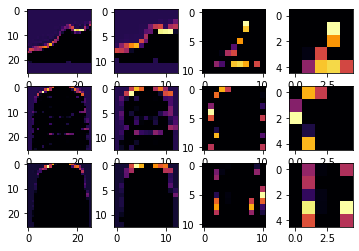

In [10]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)